# Prodigy InfoTech Task 3




# Dataset : https://www.kaggle.com/c/dogs-vs-cats/data



# Import libraries

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os

import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns

'''setting seed'''
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# Extracting data

In [4]:
import zipfile

# Paths to your zip files
zip_files = ['train.zip', 'test1.zip']

# Unzipping the files
for zip_file in zip_files:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        # Extract all files to the current directory
        zip_ref.extractall()
        print(f"{zip_file} unzipped successfully")


train.zip unzipped successfully
test1.zip unzipped successfully


In [5]:
TRAIN_DIR_PATH = './train'
file_names = os.listdir(TRAIN_DIR_PATH)
print(f'There are {len(file_names)} number of images in directory.')

There are 25000 number of images in directory.


In [8]:
def to_dataframe(file_names):
    files, labels = list(), list()
    for file in file_names:
        files.append(file)
        labels.append(file[:3])
    df = pd.DataFrame({'filename':files, 'label':labels})
    return df

df = to_dataframe(file_names)

In [9]:
df.head()

,filename,label
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


# Some data analysis

data set label distribution:
 cat    12500
dog    12500
Name: label, dtype: int64


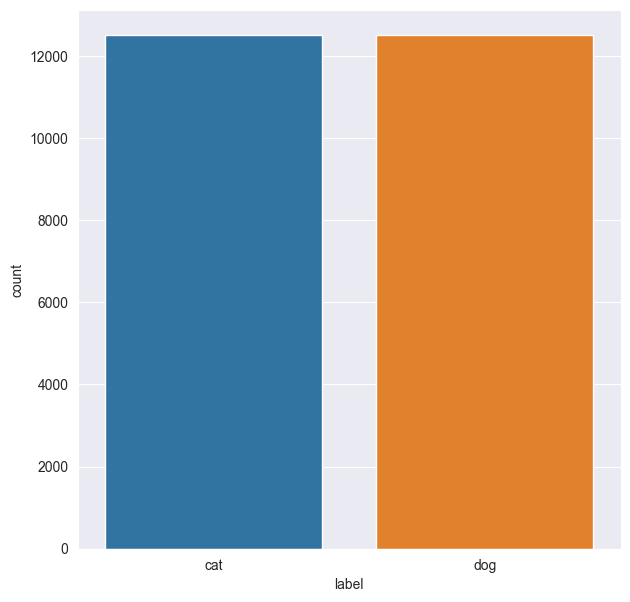

In [10]:
print('data set label distribution:\n',df['label'].value_counts())

plt.figure(figsize=(7,7))
sns.countplot(x = df['label'])
plt.show()

In [11]:
cat = [file for file in file_names if file[:3]=='cat']
dog = [file for file in file_names if file[:3]=='dog']

# Sample cat image

(500, 240, 3)


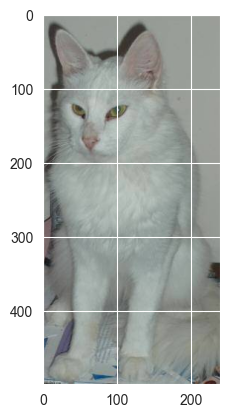

In [13]:
# Randomly print a CAT Image
im = img.imread('./train/cat.11789.jpg')
print(im.shape)
plt.imshow(im)
plt.show()

# Sample dog image

(500, 388, 3)


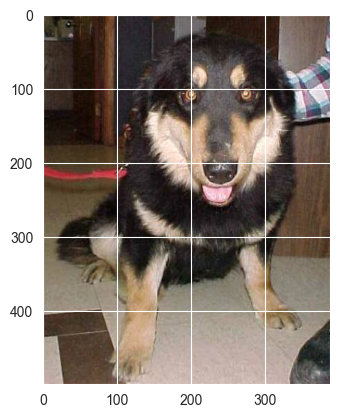

In [14]:
# Randomly print a CAT Image
im = img.imread('./train/dog.11789.jpg')
print(im.shape)
plt.imshow(im)
plt.show()

# Randomly print images

(374, 500, 3)
(169, 180, 3)
(229, 340, 3)
(374, 499, 3)


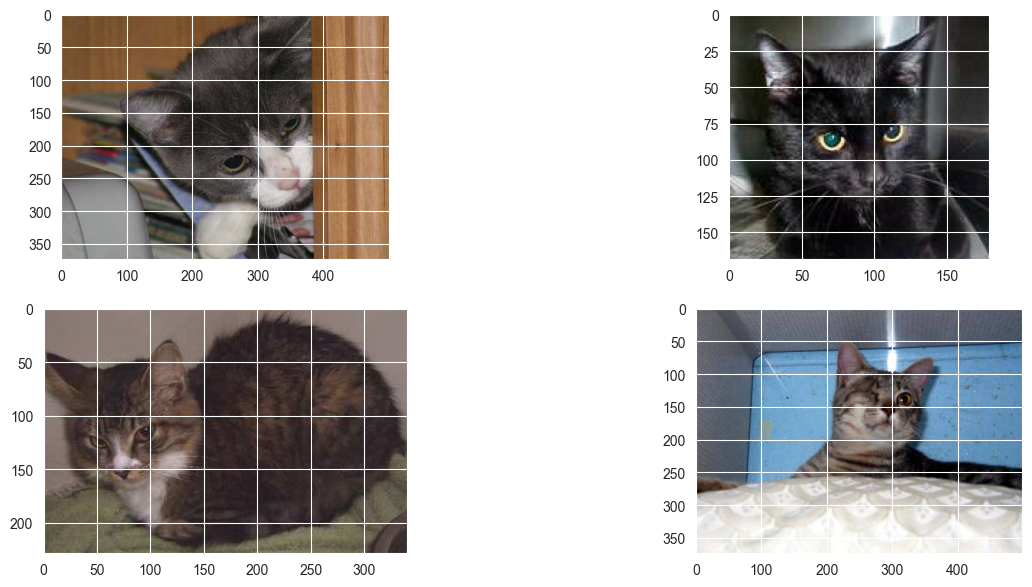

In [15]:
plt.figure(figsize=(15,7))
for i, c in enumerate(np.random.randint(0,len(cat),4), start=1):
    im = img.imread('./train/'+cat[c])
    print(im.shape)
    plt.subplot(2,2,i)
    plt.imshow(im)
plt.show()

(355, 500, 3)
(458, 383, 3)
(408, 307, 3)
(500, 351, 3)


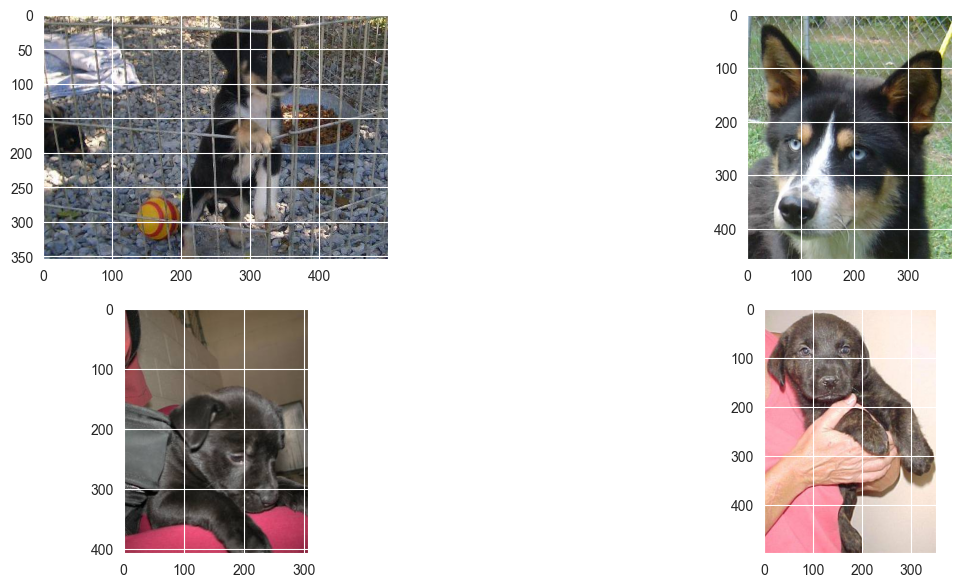

In [16]:
plt.figure(figsize=(15,7))
for i, c in enumerate(np.random.randint(0,len(dog),4), start=1):
    im = img.imread('./train/'+dog[c])
    plt.subplot(2,2,i)
    print(im.shape)
    plt.imshow(im)
plt.show()

# Data splitting

In [17]:
from sklearn.model_selection import train_test_split
train_set, valid_set = train_test_split(df, test_size=0.2,random_state=seed)

train_set.shape, valid_set.shape

((20000, 2), (5000, 2))

train set distribution:
 cat    10004
dog     9996
Name: label, dtype: int64

valid set distribution:
 dog    2504
cat    2496
Name: label, dtype: int64



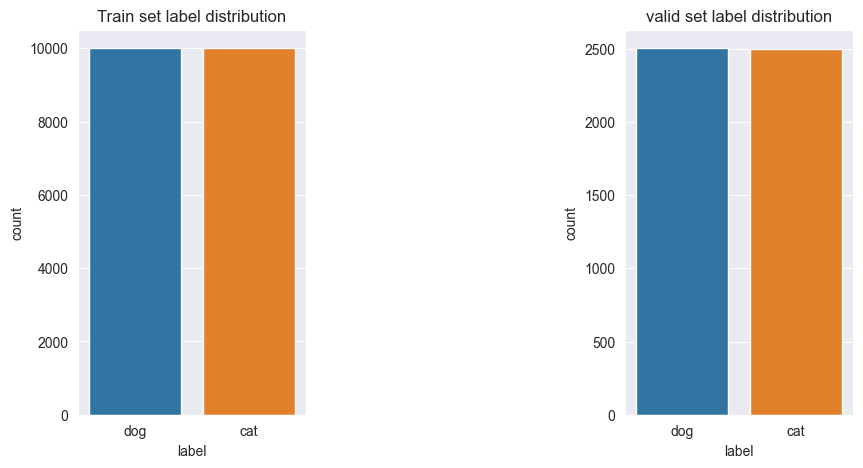

In [18]:
print('train set distribution:\n',train_set['label'].value_counts())
print('\nvalid set distribution:\n',valid_set['label'].value_counts())
print()

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x=train_set['label'], order=['dog','cat'])
plt.title('Train set label distribution')

plt.subplot(1,3,3)
sns.countplot(x=valid_set['label'], order=['dog','cat'])
plt.title('valid set label distribution')
plt.show()

# Image data Generator and Data Augmentation

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

WIDTH, HEIGHT = 150, 150
batch_size = 32

train_datagenerator = ImageDataGenerator(rotation_range=15,
                                         rescale=1./255,
                                         shear_range=0.1,
                                         zoom_range=0.2,
                                         horizontal_flip=True,
                                         width_shift_range=0.1,
                                         height_shift_range=0.1)

training_data = train_datagenerator.flow_from_dataframe(dataframe=train_set,
                                                        directory='./train',
                                                        x_col='filename',
                                                        y_col='label',
                                                        target_size=(WIDTH, HEIGHT),
                                                        class_mode='categorical',
                                                        batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.


In [20]:
training_data.class_indices

{'cat': 0, 'dog': 1}

In [21]:
training_data.filenames[:10]

['cat.7986.jpg',
 'dog.4066.jpg',
 'dog.1049.jpg',
 'dog.6732.jpg',
 'dog.2250.jpg',
 'dog.6835.jpg',
 'cat.11832.jpg',
 'dog.11221.jpg',
 'cat.10491.jpg',
 'dog.8079.jpg']

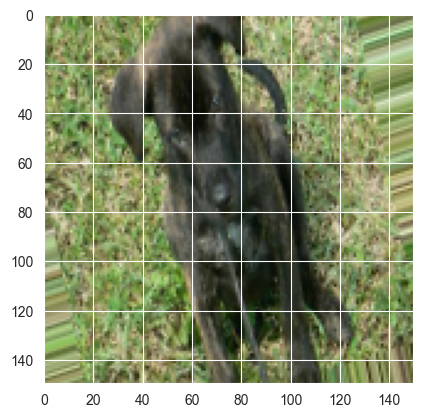

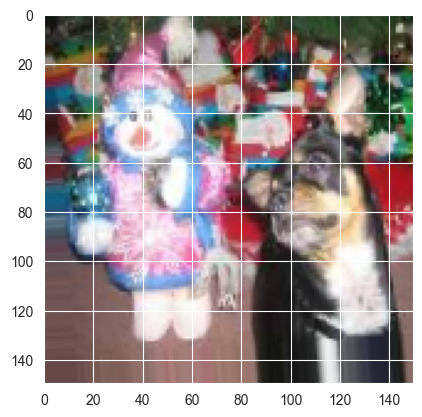

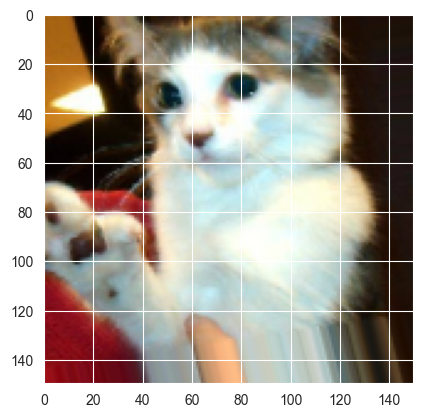

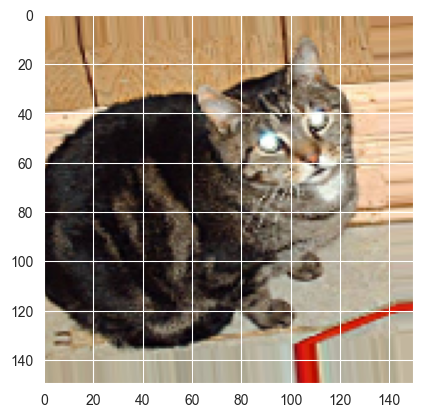

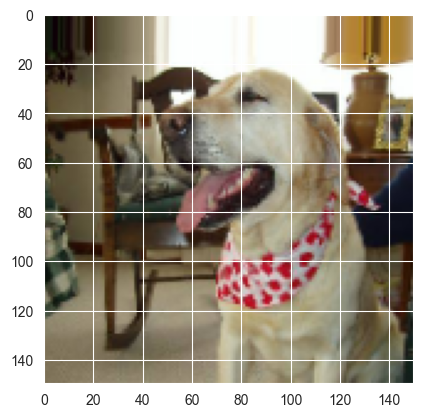

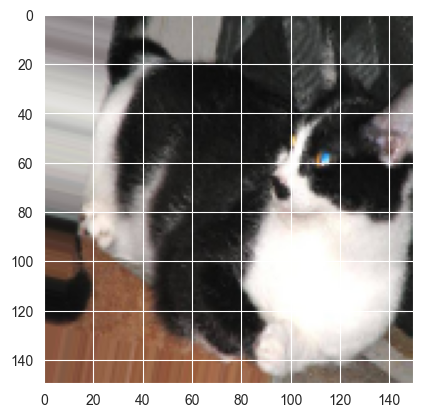

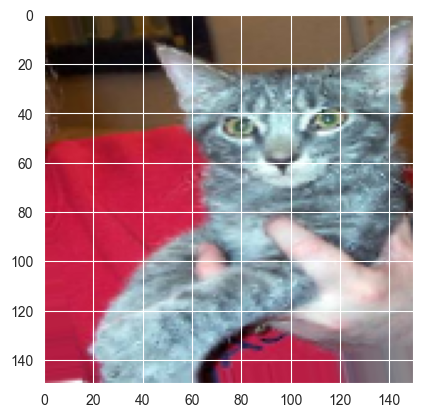

In [22]:
for i in range(len(training_data.filenames)):
    image, label = training_data.next()

    # display the image from the iterator
    plt.imshow(image[0])
    #     print(new_dict[label[0]])
    plt.show()
    if i >5:
        break

In [23]:
valid_datagenerator = ImageDataGenerator(rescale=1./255)
validation_data = valid_datagenerator.flow_from_dataframe(dataframe=valid_set,
                                                          directory='./train',
                                                          x_col='filename',
                                                          y_col='label',
                                                          target_size=(WIDTH,HEIGHT),
                                                          class_mode='categorical',
                                                          batch_size=batch_size)

Found 5000 validated image filenames belonging to 2 classes.


# Convolutional Neural Network model

In [24]:
from tensorflow.keras.layers import *
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential()

model.add(DefaultConv2D(filters=32, kernel_size=5, input_shape=(WIDTH, HEIGHT, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(DefaultConv2D(filters=64))
model.add(DefaultConv2D(filters=64))
model.add(MaxPooling2D(pool_size=2))

model.add(DefaultConv2D(filters=128))
model.add(DefaultConv2D(filters=128))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 128)       7

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import datetime
earlystop_cb = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr_cb = ReduceLROnPlateau(factor=0.5, patience=5, monitor='val_loss', min_lr=0.00001)
checkpoint_cb = ModelCheckpoint('model.h5', save_best_only=True)
# Tensorboard Setup
# -- Define Logging Directory & TimeStamp --
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%d%m%Y-%H%M")

# --TensorBoard CallBack --
tensorBoard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


callbacks = [earlystop_cb, reduce_lr_cb, checkpoint_cb,tensorBoard_callback]

# Model training

In [28]:
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [30]:
history = model.fit(training_data,
                    epochs=10,
                    validation_data=validation_data,
                    #                    validation_steps=valid_set.shape[0]//batch_size,
                    #                    steps_per_epoch=train_set.shape[0]//batch_size, 
                    validation_steps=10,
                    steps_per_epoch=10,

                    callbacks=callbacks)

Epoch 1/10
10/10 [==============================] - 15s 1s/step - loss: 0.6929 - accuracy: 0.5156 - val_loss: 0.6960 - val_accuracy: 0.4844 - lr: 0.0100
Epoch 2/10
10/10 [==============================] - 11s 1s/step - loss: 0.6918 - accuracy: 0.5125 - val_loss: 0.7022 - val_accuracy: 0.4344 - lr: 0.0100
Epoch 3/10
10/10 [==============================] - 11s 1s/step - loss: 0.6997 - accuracy: 0.4812 - val_loss: 0.6962 - val_accuracy: 0.4594 - lr: 0.0100
Epoch 4/10
10/10 [==============================] - 10s 1s/step - loss: 0.6925 - accuracy: 0.5406 - val_loss: 0.6926 - val_accuracy: 0.4875 - lr: 0.0100
Epoch 5/10
10/10 [==============================] - 11s 1s/step - loss: 0.6911 - accuracy: 0.5156 - val_loss: 0.6924 - val_accuracy: 0.4750 - lr: 0.0100
Epoch 6/10
10/10 [==============================] - 10s 1s/step - loss: 0.6940 - accuracy: 0.4938 - val_loss: 0.6909 - val_accuracy: 0.5938 - lr: 0.0100
Epoch 7/10
10/10 [==============================] - 10s 1s/step - loss: 0.6911 - a

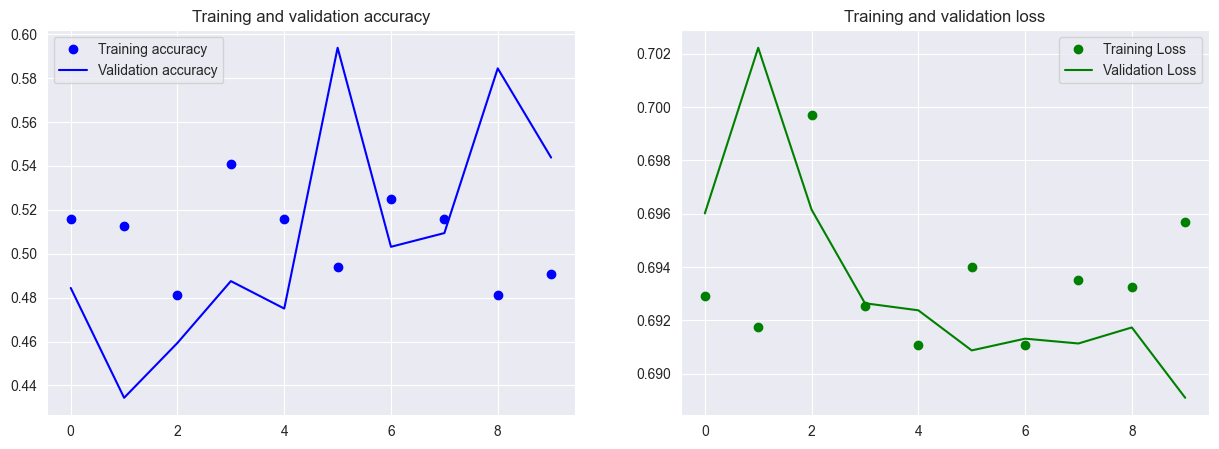

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Model evaluation

In [32]:
model1 = keras.models.load_model('model.h5')

In [33]:
test_loss, test_acc = model1.evaluate(validation_data, steps=len(validation_data), verbose=1)
print('Loss: %.3f' % (test_loss))
print('Accuracy: %.3f' % (test_acc * 100.0))

157/157 [==============================] - 27s 174ms/step - loss: 0.6936 - accuracy: 0.4992
Loss: 0.694
Accuracy: 49.920


# Transfer learning by training VGG16 architecture

In [34]:
base_model = keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(WIDTH,HEIGHT,3))
base_model.trainable = False ## Not trainable weights

58889256/58889256 [==============================] - 75s 1us/step


In [35]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [36]:
from tensorflow.keras.layers import *

model = keras.models.Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

In [37]:
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(training_data,
                    epochs=4,
                    validation_data=validation_data,
                    #             validation_steps=valid_set.shape[0]//batch_size,
                    #             steps_per_epoch=train_set.shape[0]//batch_size, 
                    validation_steps=10,
                    steps_per_epoch=10,
                    )

Epoch 1/4
10/10 [==============================] - 25s 2s/step - loss: 0.9116 - accuracy: 0.5938 - val_loss: 0.7671 - val_accuracy: 0.5219
Epoch 2/4
10/10 [==============================] - 23s 2s/step - loss: 0.7277 - accuracy: 0.5406 - val_loss: 0.6834 - val_accuracy: 0.5000
Epoch 3/4
10/10 [==============================] - 23s 2s/step - loss: 0.5890 - accuracy: 0.6844 - val_loss: 0.4551 - val_accuracy: 0.8094
Epoch 4/4
10/10 [==============================] - 23s 2s/step - loss: 0.5303 - accuracy: 0.7219 - val_loss: 0.5238 - val_accuracy: 0.7188


In [39]:
test_loss, test_acc = model.evaluate(validation_data, steps=len(validation_data), verbose=1)
print('Loss: %.3f' % (test_loss))
print('Accuracy: %.3f' % (test_acc * 100.0))

157/157 [==============================] - 181s 1s/step - loss: 0.5224 - accuracy: 0.7232
Loss: 0.522
Accuracy: 72.320


In [40]:
model.layers[0].trainable=True

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               1048704   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 258       
                                                                 
Total params: 15,763,650
Trainable params: 15,763,650
Non-trainable params: 0
_________________________________________________________________


In [42]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('model1.h5',save_best_only=True)
earlystop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(training_data,
                    epochs=5,
                    validation_data=validation_data,
                    #             validation_steps=valid_set.shape[0]//batch_size,
                    #             steps_per_epoch=train_set.shape[0]//batch_size, 
                    validation_steps=10,
                    steps_per_epoch=10,
                    callbacks=[checkpoint_cb, earlystop_cb])

Epoch 1/5
10/10 [==============================] - 68s 7s/step - loss: 0.4457 - accuracy: 0.7844 - val_loss: 0.3495 - val_accuracy: 0.8500
Epoch 2/5
10/10 [==============================] - 58s 6s/step - loss: 0.3836 - accuracy: 0.8125 - val_loss: 0.3827 - val_accuracy: 0.8250
Epoch 3/5
10/10 [==============================] - 58s 6s/step - loss: 0.2768 - accuracy: 0.8781 - val_loss: 0.2339 - val_accuracy: 0.9000
Epoch 4/5
10/10 [==============================] - 60s 6s/step - loss: 0.2742 - accuracy: 0.8906 - val_loss: 0.2324 - val_accuracy: 0.9031
Epoch 5/5
10/10 [==============================] - 57s 6s/step - loss: 0.2708 - accuracy: 0.8719 - val_loss: 0.2127 - val_accuracy: 0.8938


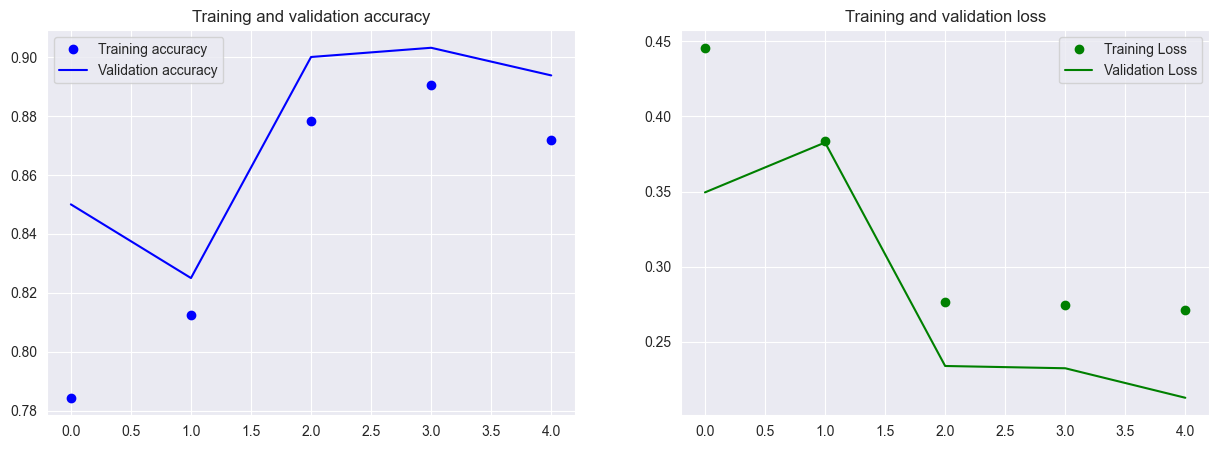

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Final evaluation

In [44]:
model2 = keras.models.load_model('model1.h5')


test_loss, test_acc = model2.evaluate(validation_data, steps=len(validation_data), verbose=1)
print('Loss: %.3f' % (test_loss))
print('Accuracy: %.3f' % (test_acc * 100.0))

157/157 [==============================] - 175s 1s/step - loss: 0.1774 - accuracy: 0.9238
Loss: 0.177
Accuracy: 92.380


### *I hope this notebook was useful.*


#### reach me via : https://www.linkedin.com/in/ehab-mahmoud-ali-77ab0a243/